# IND320 - Dashboard basics

## Introduction
This notebook explores the dataset provided for part 1 of the project work.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Import
Loaded the CSV file into a pandas DataFrame.

In [2]:
df = pd.read_csv("open-meteo-subset.csv")
df.head()

,time,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
0,2020-01-01T00:00,-2.2,0.1,9.6,21.3,284
1,2020-01-01T01:00,-2.2,0.0,10.6,23.0,282
2,2020-01-01T02:00,-2.3,0.0,11.0,23.5,284
3,2020-01-01T03:00,-2.3,0.0,10.6,23.3,284
4,2020-01-01T04:00,-2.7,0.0,10.6,22.8,284


## Insepection
Checked the data types, missing values, and summary statistics.

In [3]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   time                    8760 non-null   object 
 1   temperature_2m (°C)     8760 non-null   float64
 2   precipitation (mm)      8760 non-null   float64
 3   wind_speed_10m (m/s)    8760 non-null   float64
 4   wind_gusts_10m (m/s)    8760 non-null   float64
 5   wind_direction_10m (°)  8760 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 410.8+ KB


,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,-0.394909,0.222854,3.661689,8.300719,212.209589
std,6.711903,0.493747,2.253210,5.098909,91.371980
min,-19.300000,0.000000,0.100000,0.200000,0.000000
25%,-4.900000,0.000000,1.800000,4.500000,128.000000
50%,-1.000000,0.000000,3.300000,7.700000,238.000000
75%,4.100000,0.200000,5.100000,11.500000,292.000000
max,19.900000,5.800000,13.600000,28.700000,360.000000


## Data preparation
Converted the time column to datetime and set it as the index.

In [4]:
# Make sure 'time' is a datetime index
if 'time' in df.columns:
    df['time'] = pd.to_datetime(df['time'])
    df = df.set_index('time').sort_index()
else:
    # 'time' is already the index; ensure dtype is datetime
    if df.index.dtype != 'datetime64[ns]':
        df.index = pd.to_datetime(df.index)
    df = df.sort_index()

# List of numeric columns to plot (match your CSV headers exactly)
value_cols = [
    'temperature_2m (°C)',
    'precipitation (mm)',
    'wind_speed_10m (m/s)',
    'wind_gusts_10m (m/s)',
    'wind_direction_10m (°)'
]

## Visualization – Individual Plots
Plotted each variable separately.

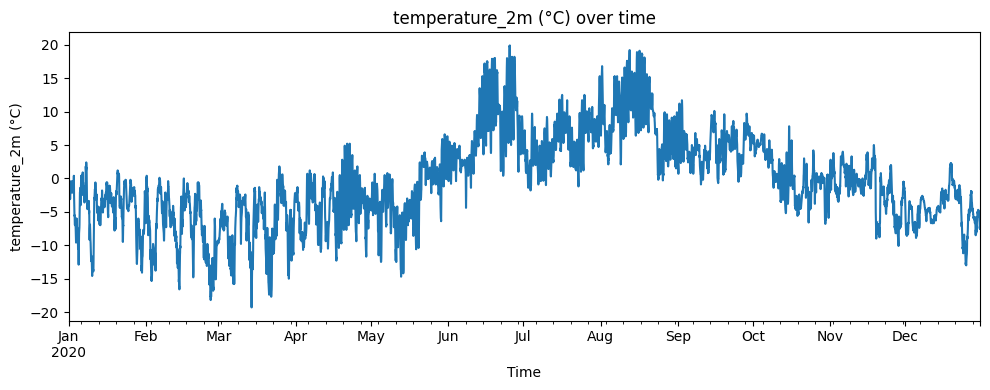

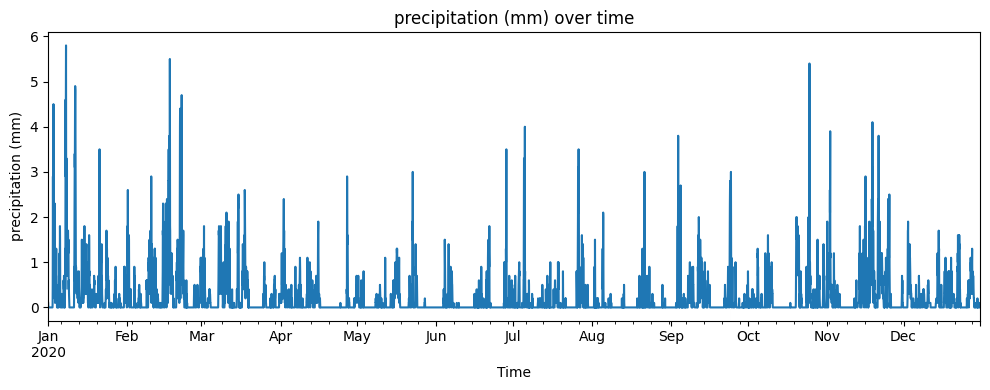

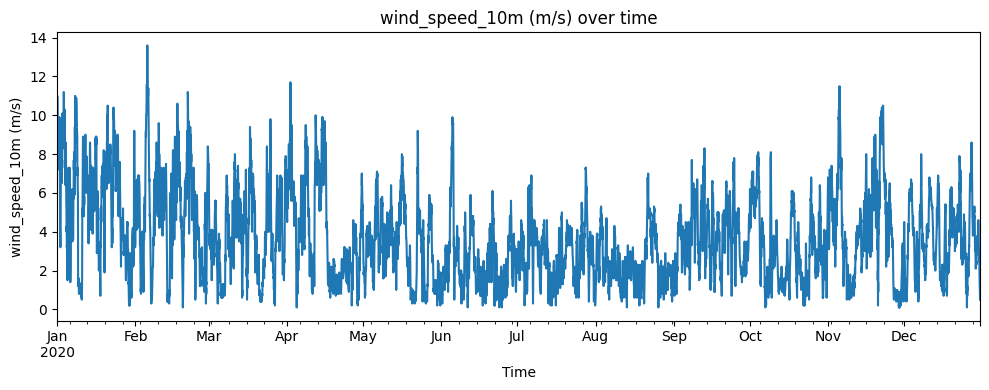

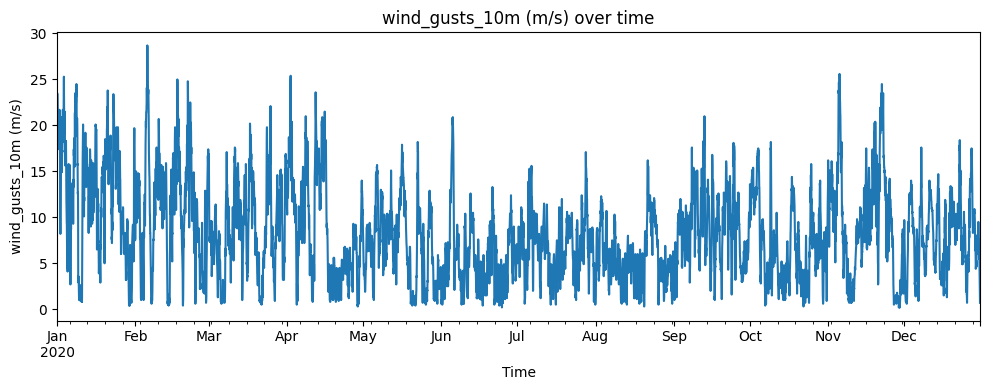

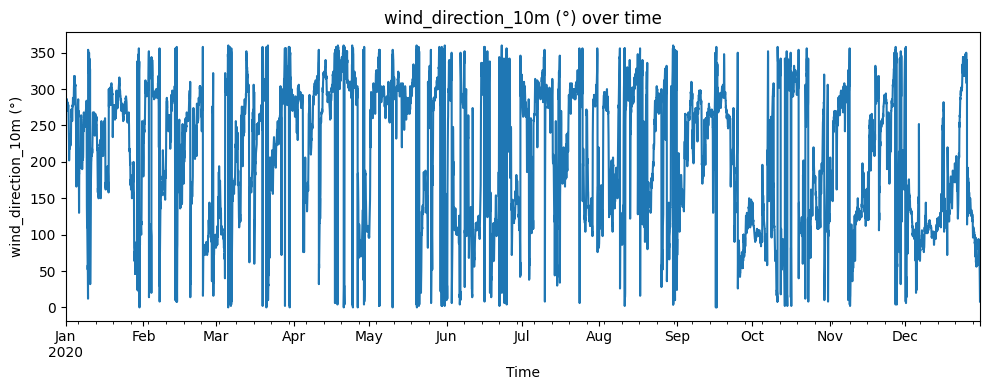

In [5]:
for col in value_cols:
    plt.figure(figsize=(10,4))
    df[col].plot()
    plt.title(f"{col} over time")
    plt.xlabel("Time")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

## Visualization – All Variables Together
Plotted all variables in a single chart, even though they use different units. Normalized from 0-1 but to make the different values easier to compare, even though the graph is still very noisy.


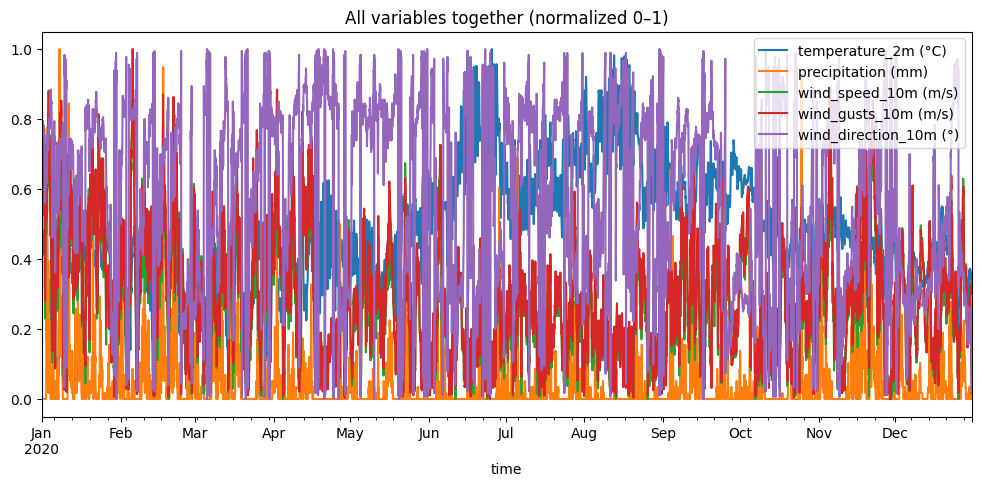

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = pd.DataFrame(
    scaler.fit_transform(df[value_cols]),
    index=df.index,
    columns=value_cols
)

scaled.plot(figsize=(12,5))
plt.title("All variables together (normalized 0–1)")
plt.show()

## AI Usage
I used ChatGPT 5 to help me structure the notebook, write code and fix errors i encountered.


## Log

Working on this project gave me my first experience using Jupyter Notebook and Streamlit. I had some minimal experience using matplotlib and pandas from work, but had forgotten most of it. I was unsure how to structure the notebook properly, where to place the dataset, and how to write the code. But using chatgpt to analyze the task i got a better grip on what was expected from the task.

In the Jupyter Notebook, I started by importing the CSV file using pandas. I explored the dataset with head(), info(), and describe(), so that i could understand the structure and ranges of the variables. I ran into problems with pandas indexes when converting the time column into a datetime index. I got a KeyError because I tried to access the time column after it had already been set as the index. but through troubleshooting i got a better understanding of how DataFrames handle indexes.

I had plotted using matplotlib before, making individual plots for each variable was simple, but plotting all of them together showed the issue of different units and scales. The combined plot didn't make a lot of sense, but by normalizing the values i felt the graph became more relevant. I felt it still looked messy, but still worked better for comparing trends.

I also learned to structure my notebook with Markdown headings and explanations. This made it much more organized and readable.

I had never used streamlit before so this was completely new for me. I created the four pages including a sidebar navigation, added a data table with line charts for the first month, and built an interactive plotting page with dropdowns and sliders. 

Overall, I learned a lot working with these different technologies. Mistakes like missing files or index errors were part of the process, and solving them step by step gave me a better understanding of the setup.


## Links

Github repo link: https://github.com/youneshansen/ind320-yohan3351
Streamlit link: https://ind320-yohan3351.streamlit.app/